In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some simple questions to consider at first:
- Who were the passengers on the Titanic?
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who are alone and who was with their families?
- What factors helped someone survive the sinking? ***

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

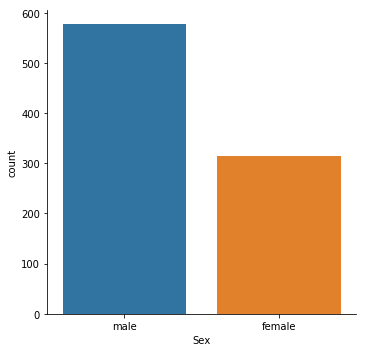

In [27]:
#Who were the passengers on the Titanic?

#Let's first check gender:
sns.factorplot(x='Sex',data=titanic_df,kind='count')

There are way more males than females on Titanic.

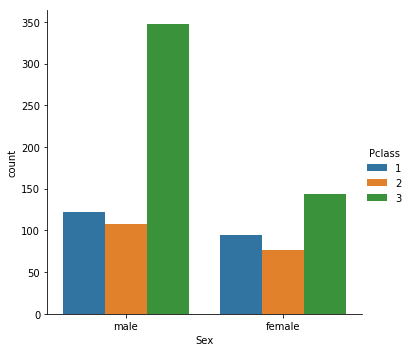

In [29]:
#Separate the Gender by Class:
sns.factorplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

More males are in the third class than females.

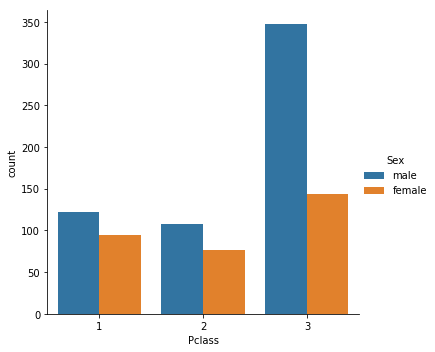

In [30]:
sns.factorplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

We can really tell the difference that much more of the third class were male than female.

There is a rule called "women and children first", and that would be an important factor to consider the survival rate.

In [31]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age <16:
        return 'child'
    else:
        return sex

In [32]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [33]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In the last row, there is a child who is a 14-year girl.

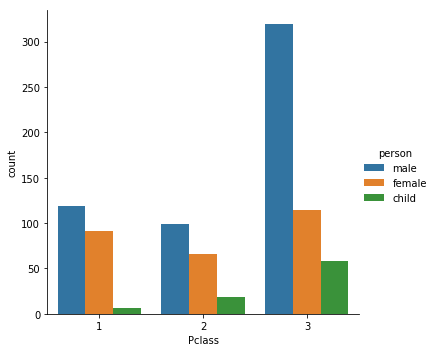

In [34]:
sns.factorplot(x='Pclass',data=titanic_df,hue='person',kind='count')

Now, we've separated all the classes by male,female or child. We can see that more children are in the third class and not somany in the first class.

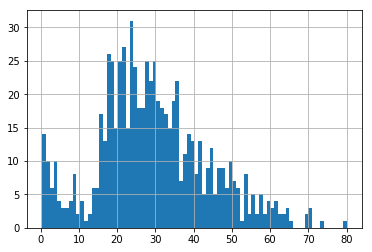

In [39]:
#Create a distribution of the ages to get more information:
titanic_df['Age'].hist(bins=80)

This is the distribution of the ages. You can see a peak at really yound childfren starts to come down towards ten years old, and then you get a more normal distribution in age. Mean looks like it's around 30ish.

In [40]:
#Find mean of the ages:
titanic_df['Age'].mean()

29.69911764705882

In [41]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64